<a href="https://colab.research.google.com/github/angulorojasmariaclaudia-coder/SOLUCION-DE-PRACTICAS-DE-APRENDIZAJE-AUTOMATICO-I/blob/main/Solucion_Practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA N°3: LIBRERÍAS BÁSICAS Y PRIMEROS PASOS DE CLUSTERING**

*Objetivo: Aprender a usar lo más habitual de las librerías fundamentales y visualizar la información con distintos tipos de gáficos interpretándolos adecuadamente.*

In [ ]:
#Importamos las librerias

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import   seaborn as sns

**EJERCICIO N°1:**

**a). Descargamos los ficheros del dataset.**

In [99]:
sns.set(style="whitegrid")

data = pd.read_csv("Centro_Comercial.csv")

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**b). Mostramos la información de las columnas.**

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**c). ¿Qué significa cada uno de los datos que aparecen en la tabla anterior? ¿Qué columnas hay?
    ¿Qué crees que significa el spending score? ¿Cómo se habrá conseguido?**

Las columnas del dataset son las siguientes:
* CustomerID:
Identificador único del cliente. Solo sirve como referencia, no aporta información útil para clustering.
* Gender:
Género del cliente (“Male”, “Female”).
* Age:
Edad del cliente.
* Annual Income (k$):
Ingreso anual en miles de dólares.
* Spending Score (1–100):
Puntuación del gasto del cliente. Representa el comportamiento de compra: clientes con valores altos gastan más o compran con mayor frecuencia.

El *Spending Score*, se obtiene Mediante el programa de fidelización del centro comercial, analizando:
* Frecuencia de compras.
* Cantidad gastada.
* Promedio de consumo.


**d). Muestra únicamente la información de las columnas.**

In [101]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**e). Si te das cuenta, toda la información está en inglés. Traduce los nombres de las columnas y reemplaza los datos de la columna Gender para tenerlos en español.**

In [102]:
# Renombramos columnas
data = data.rename(columns={
    "CustomerID": "ID_Cliente",
    "Gender": "Genero",
    "Age": "Edad",
    "Annual Income (k$)": "Ingreso_Anual_k",
    "Spending Score (1-100)": "Puntacion_Gasto"
})

# Reemplazar valores
data["Genero"] = data["Genero"].replace({"Male": "Hombre", "Female": "Mujer"})

data.columns

Index(['ID_Cliente', 'Genero', 'Edad', 'Ingreso_Anual_k', 'Puntacion_Gasto'], dtype='object')

**f). Muestra los datos de las 8 primeras personas de la base de datos.**

In [103]:
data.head(8)

,ID_Cliente,Genero,Edad,Ingreso_Anual_k,Puntacion_Gasto
0,1,Hombre,19,15,39
1,2,Hombre,21,15,81
2,3,Mujer,20,16,6
3,4,Mujer,23,16,77
4,5,Mujer,31,17,40
5,6,Mujer,22,17,76
6,7,Mujer,35,18,6
7,8,Mujer,23,18,94


**g). Muestra las dimensiones del dataset.¿Cuántas filas hay? ¿Cuántos atributos?**

In [104]:
data.shape

(200, 5)

Las dimensiones del dataset es:
* Filas - 200
* Atributos - 5

**h).	Muestra los estadísticos básicos.**

In [105]:
data.describe()

,ID_Cliente,Edad,Ingreso_Anual_k,Puntacion_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**i). ¿Qué significan los datos? Interprétalos e intenta sacar alguna conclusión (o indicio), a partir de ellos.**

Al interpretar la data que muestra la tabla de estadísticos básicos, se llega a la conclusión que:
* La edad media es alrededor de 38 años, o sea se tiene un público adulto.
* El ingreso anual medio es 60 560000 euros.
* La puntuación de gasto tiene media 50, hay mucha variabilidad.
* Los valores mínimos y máximos están dentro de rangos realistas, no parece haber datos negativos ni fuera de rango.


**j). Comprueba si hay algún elemento nulo entre los datos. Comprueba también si hay algún dato erróneo, por ejemplo, que haya alguna edad, salario o puntuación negativa.**

In [106]:
data.isnull().sum()

,0
ID_Cliente,0
Genero,0
Edad,0
Ingreso_Anual_k,0
Puntacion_Gasto,0


Ejecutando el comando data.isnull( ).sum( ), se visualiza que no hay valores nulos en ninguna columna, significando ello que el dataset está completo y no requiere imputación ni limpieza en este aspecto.

In [107]:
data.select_dtypes(include=np.number).lt(0).sum()

,0
ID_Cliente,0
Edad,0
Ingreso_Anual_k,0
Puntacion_Gasto,0


Asimismo, al ejecutar el comando data.select_dtypes(include=np.number).lt(0).sum( ), todas las columnas numéricas tienen cero valores negativos, lo cual confirma que no existen valores erróneos en estas variables.

**k). Muestra el histograma (por ejemplo, con histplot de Seaborn) de la distribución del salario y de la edad.**

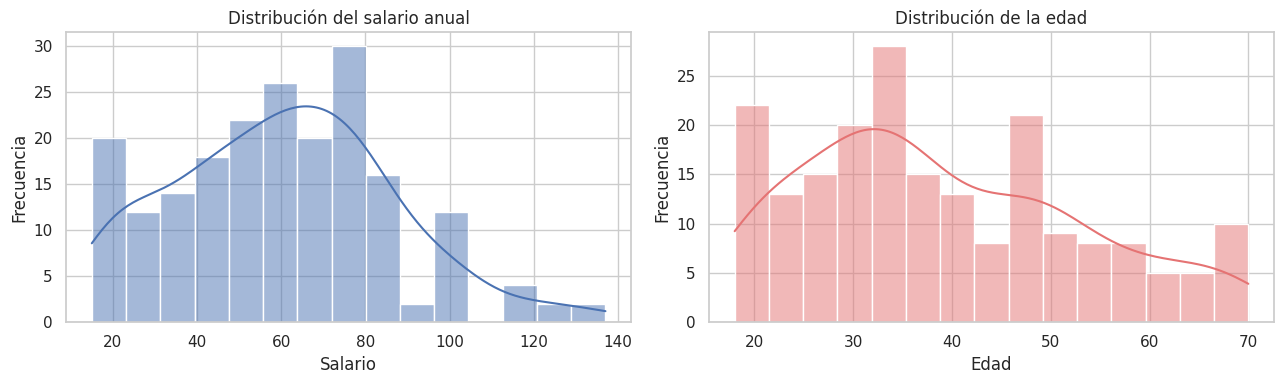

In [108]:
#HISTOGRAMA DE DISTRIBUCIÓN
fig, axs = plt.subplots(1, 2, figsize=(13,4))

# Histograma del SALARIO ANUAL (primero)
sns.histplot(data["Ingreso_Anual_k"], kde=True, bins=15,
             ax=axs[0], color="#4A72B2")  # azul elegante
axs[0].set_title("Distribución del salario anual", fontsize=12)
axs[0].set_xlabel("Salario")
axs[0].set_ylabel("Frecuencia")

# Histograma de la EDAD (segundo)
sns.histplot(data["Edad"], kde=True, bins=15,
             ax=axs[1], color="#E57373")  # rojo claro
axs[1].set_title("Distribución de la edad", fontsize=12)
axs[1].set_xlabel("Edad")
axs[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

**l). Interpreta los datos. ¿Qué significan los histogramas? ¿Puedes decir ya algo?**

Los histogramas muestran como se distribuye una variable numérica, lo cual permite ver la distribución del salario anual y la distribución de la edad.

En cuanto al histograma ***“Distribución del salario anual”***, muestra cuantas personas tienen cada rango de ingreso anual, lo cual no va repartido de forma uniforme, apareciendo una distribución bimodal indicando dos grupos de clientes grandes de clientes según su capacidad económica.

Finalmente, el histograma ***“Distribución de la edad”***, muestra que la mayoría de clientes van en un rango de edad de 20 a 50 años, no hay personas muy jóvenes o muy mayores y la distribución no es simétrica. Esto indicando que el centro comercial tiene un publico mayoritariamente adulto joven, influenciado por el tipo de servicio o productos que se ofrecen.


**m). Haz lo mismo, pero para la puntuación. Pon que haya 10 columnas**

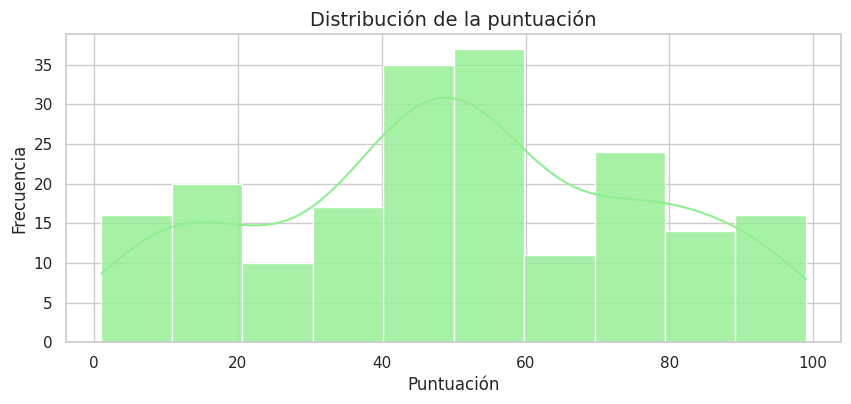

In [109]:
#HISTOGRAMA SPENDING SCORE
plt.figure(figsize=(10,4))

sns.histplot(
    data["Puntacion_Gasto"],
    bins=10,
    kde=True, #agrega la curva suave
    color="lightgreen",       # color verde claro
    edgecolor="white",        # bordes blancos
    alpha=0.8                 # transparencia
)

plt.title("Distribución de la puntuación", fontsize=14)
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")

plt.show()

**n). Intenta conseguir el siguiente gráfico (pie), incluyendo la leyenda.**

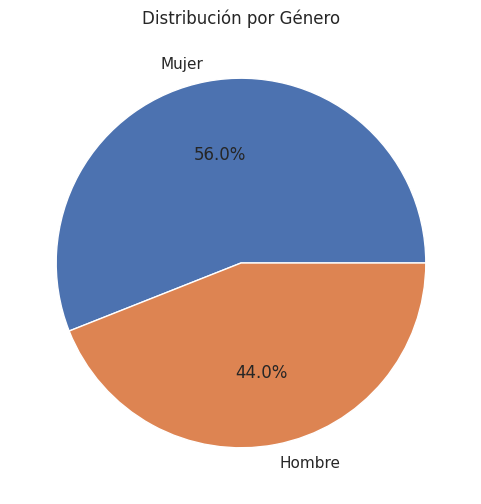

In [110]:
#GRAFICO PIE CHART - GENERO
data["Genero"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Distribución por Género")
plt.ylabel("")
plt.show()

**o). Muestra cuántas personas hay con cada edad mediante un gráfico (countplot).**

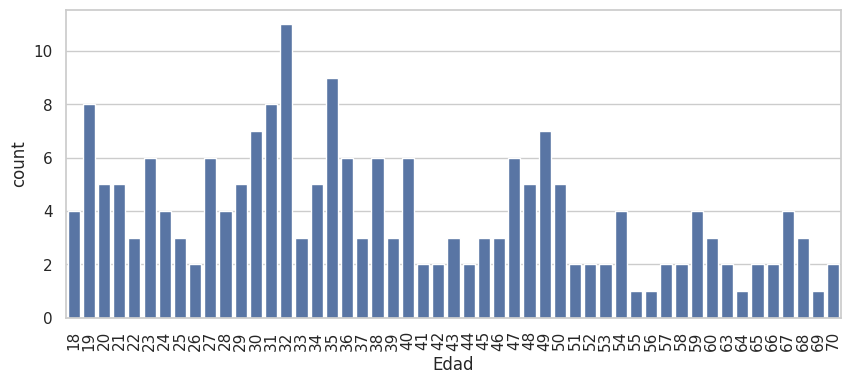

In [111]:
#COUNTPLOT - EDAD
plt.figure(figsize=(10,4))
sns.countplot(x="Edad", data=data)
plt.xticks(rotation=90)
plt.show()

**p). Haz lo mismo para la puntuación y para el salario.**

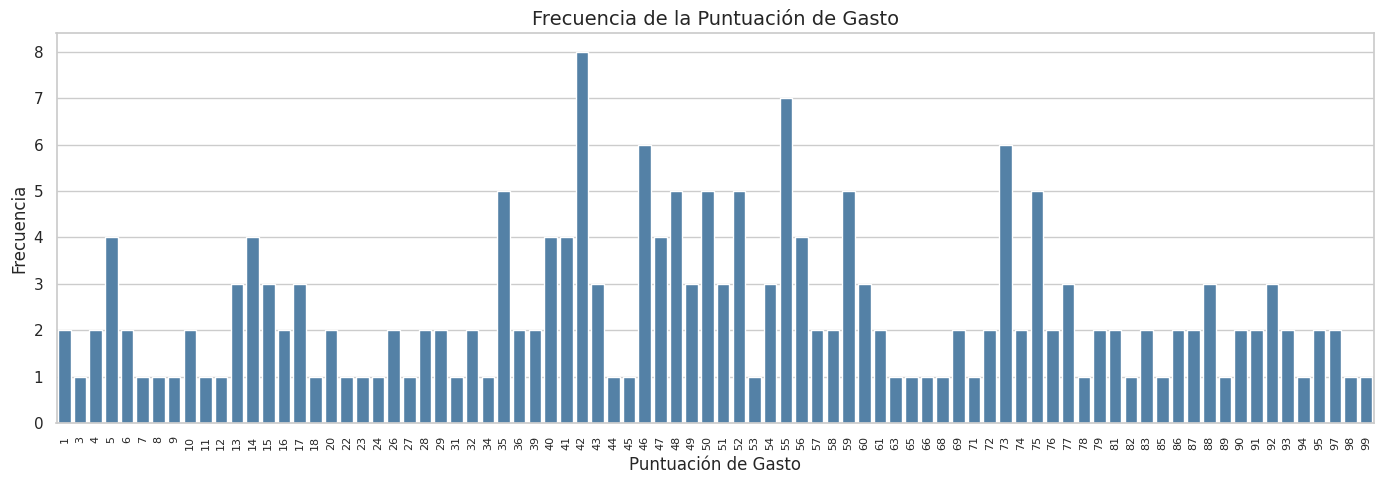

In [112]:
#COUNTPLOT  - PUNTUACION
plt.figure(figsize=(14,5))
sns.countplot(x="Puntacion_Gasto", data=data, color="steelblue")

plt.xticks(rotation=90, fontsize=8)   # etiquetas más pequeñas
plt.title("Frecuencia de la Puntuación de Gasto", fontsize=14)
plt.xlabel("Puntuación de Gasto")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

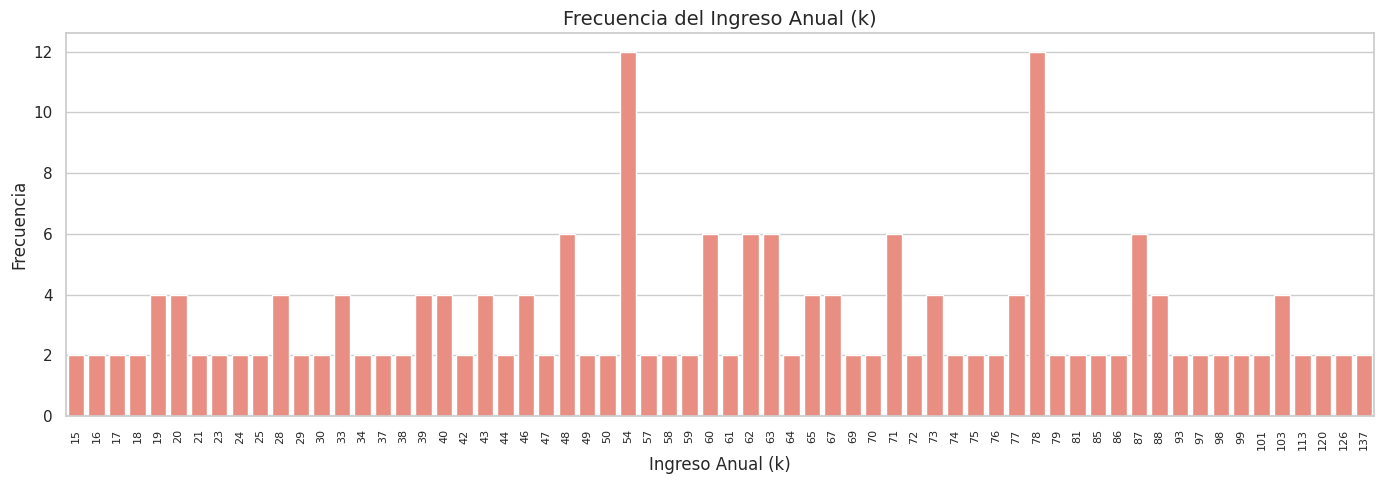

In [113]:
#COUNTPLOT - SALARIO
plt.figure(figsize=(14,5))
sns.countplot(x="Ingreso_Anual_k", data=data, color="salmon")

plt.xticks(rotation=90, fontsize=8)
plt.title("Frecuencia del Ingreso Anual (k)", fontsize=14)
plt.xlabel("Ingreso Anual (k)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

**q). Muestra el pairplot de todas las variables y analiza lo que ves. ¿Qué significa cada cosa?
¿Puedes sacar alguna conclusión o indicio a partir de los gráficos?**

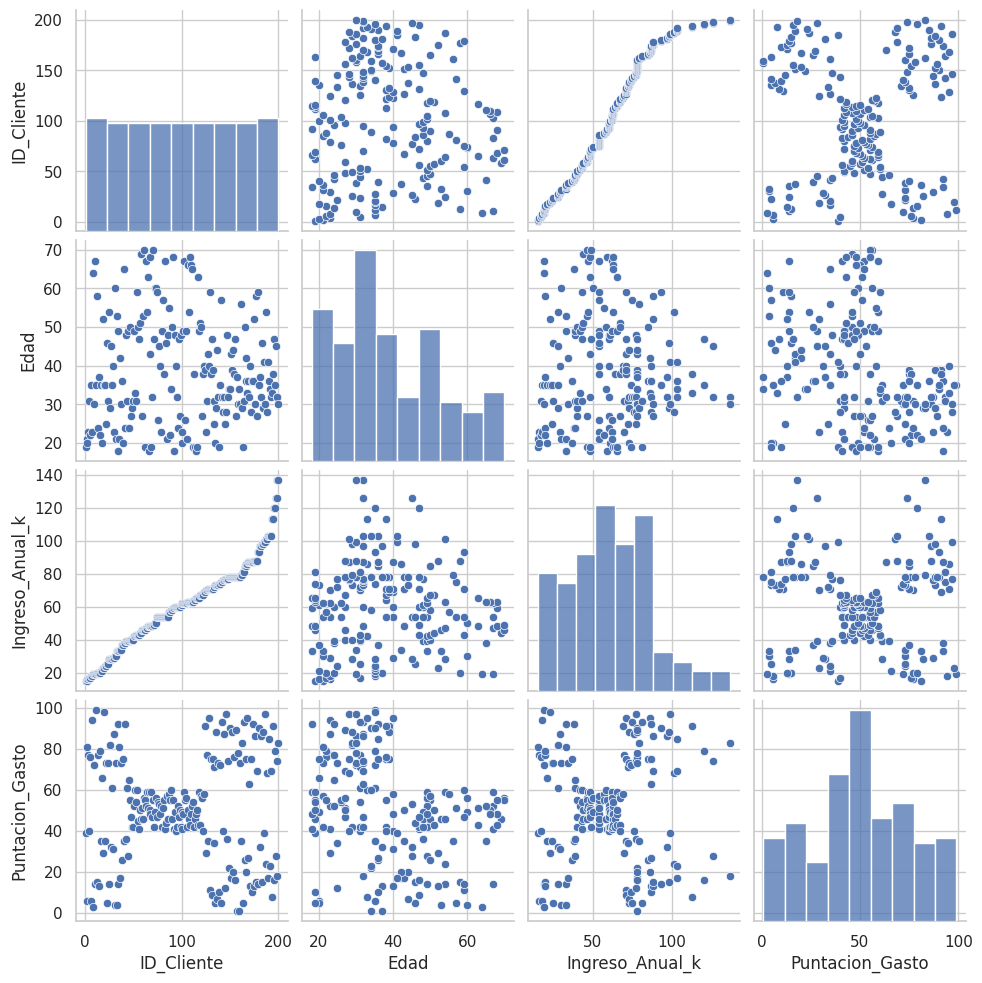

In [114]:
#PAI
sns.pairplot(data)
plt.show()

Ejecutando el comando sns.pairplot(data) , se visualiza la imagen en la cual se interpreta que el pairplot permite observar simultáneamente la distribución y la relación entre todas las variables del dataset. En la diagonal se muestran los histogramas, y fuera de ella, gráficos de dispersión entre cada par de variables.
A partir del pairplot se observa que:
* El ID del cliente no aporta información relevante, ya que únicamente actúa como un índice secuencial.
* La edad no muestra una relación clara con el ingreso ni con la puntuación de gasto.
* El ingreso anual presenta una distribución bimodal, lo que indica dos grupos económicos diferenciados.
* La puntuación de gasto está distribuida de forma dispersa y no depende directamente de la edad ni del ingreso.

Aunque no se observa una relación lineal entre las variables, sí se aprecian ciertas concentraciones de puntos, especialmente entre ingreso y puntuación, lo que sugiere la posible existencia de grupos o segmentos de clientes. Esto indica que aplicar clustering más adelante puede ser una buena estrategia para identificar diferentes perfiles de comportamiento.

**r). Crea un mapa de calor de los datos e interprétalo.**

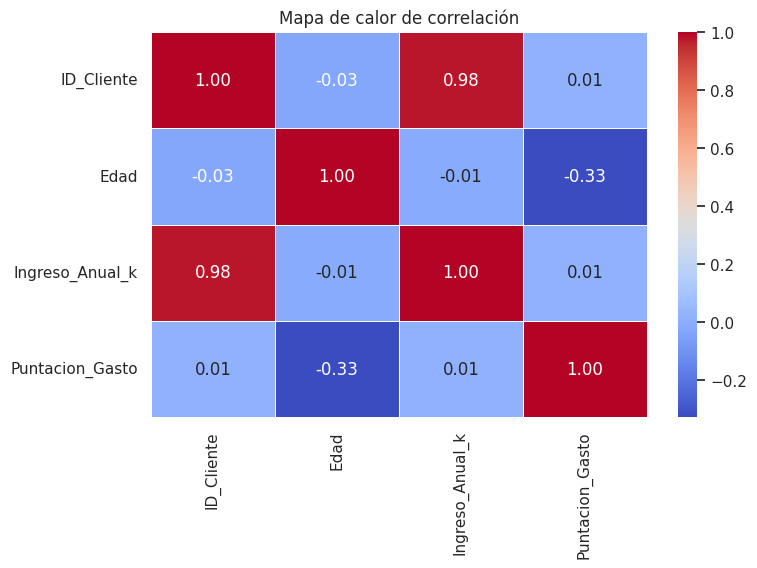

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(
    data.select_dtypes(include='number').corr(),   # solo columnas numéricas
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Mapa de calor de correlación")
plt.show()

El ***heatmap*** muestra que no existen correlaciones fuertes entre edad, salario y puntuación de gasto. La única correlación alta es entre ID y salario (+0.98), pero es un efecto artificial del orden del dataset. La puntuación de gasto apenas depende del salario (0.01) y solo tiene una ligera relación negativa con la edad (-0.33), lo que indica que los clientes más jóvenes gastan un poco más.

**s). ¿Nos interesa el atributo ID? ¿Por qué está tan correlado con el salario anual?**

En este caso, no nos interesa el atributo ***ID_Cliente***, pues no es relevante para el análisis, porque solo sirve como identificador y no aporta información sobre los clientes. La fuerte correlación con el salario anual es artificial: ocurre porque el dataset está ordenado, por lo que el ID_Cliente aumenta al mismo tiempo que el salario. No es una relación real, sino una correlación espuria debida al orden de los datos.

**t). Muestra una trama de violín e intenta interpretar lo que ves.**

/tmp/ipython-input-292649875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


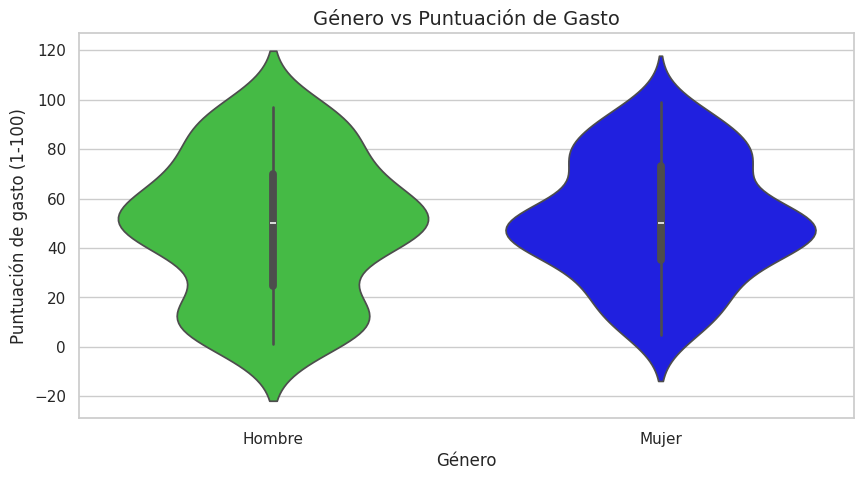

In [ ]:
plt.figure(figsize=(10,5))

sns.violinplot(
    x="Genero",
    y="Puntacion_Gasto",
    data=data,
    palette=["limegreen", "blue"]
)

plt.title("Género vs Puntuación de Gasto", fontsize=14)
plt.xlabel("Género")
plt.ylabel("Puntuación de gasto (1-100)")

plt.show()

La ***gráfica de violín*** muestra la distribución de la puntuación de gasto para hombres y mujeres. En ambos casos, la distribución es amplia y no presenta diferencias fuertes entre géneros. Ambos grupos tienen valores altos, medios y bajos de gasto, lo que indica que la puntuación de gasto no depende claramente del género. Las formas ensanchadas muestran los rangos donde se concentra la mayor parte de las puntuaciones, mientras que las partes más estrechas representan valores menos frecuentes.

**u). Muestra un stripplot para comparar género y edad. ¿Puedes interpretar algo?**

/tmp/ipython-input-2884455215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


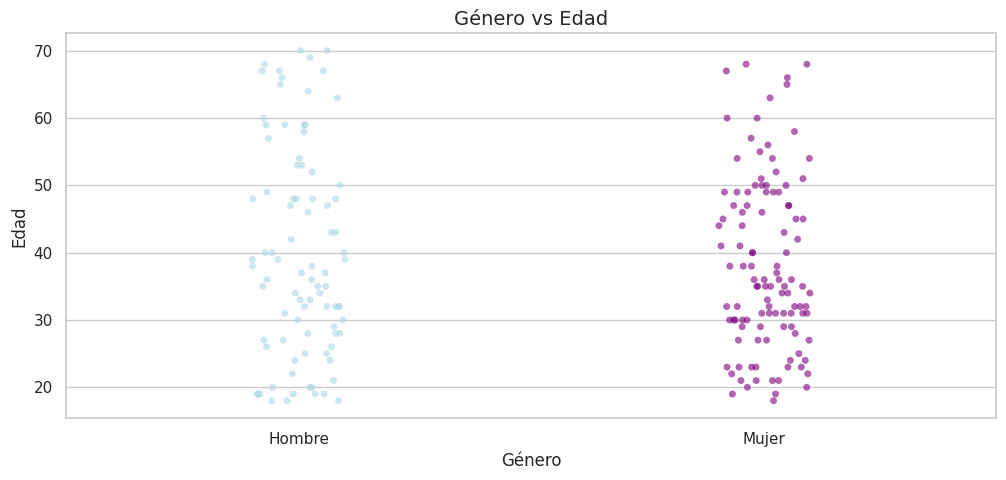

In [ ]:
plt.figure(figsize=(12,5))

sns.stripplot(
    x="Genero",
    y="Edad",
    data=data,
    jitter=True,               # dispersa ligeramente los puntos
    alpha=0.6,                 # transparencia
    palette=["lightblue", "purple"]  # colores suaves
)

plt.title("Género vs Edad", fontsize=14)
plt.xlabel("Género")
plt.ylabel("Edad")

plt.show()

El ***stripplot*** muestra cómo se distribuyen las edades de hombres y mujeres en el dataset. La dispersión de puntos es muy similar en ambos grupos, lo cual indica que no existe una diferencia clara en la edad promedio entre hombres y mujeres. Ambos géneros presentan clientes desde los 20 hasta más de 60 años, con una mayor concentración alrededor de los 30–40. En general, la edad no parece depender del género.

**v). Mediante lineplot, muestra el salario vs la edad y la puntuación. Cuidado, en este caso no queremos mostrar dos gráficos distintos, sino unirlos en el mismo con los mismos ejes.**

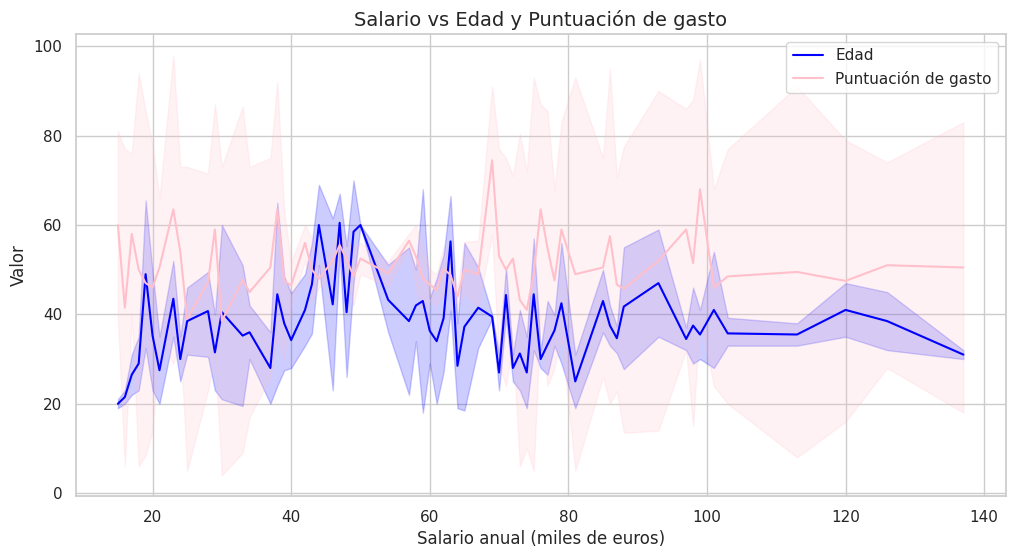

In [ ]:
plt.figure(figsize=(12,6))

# Línea azul: Edad vs Salario
sns.lineplot(
    x="Ingreso_Anual_k",
    y="Edad",
    data=data,
    label="Edad",
    color="blue"
)

# Línea rosa: Puntuación de gasto vs Salario
sns.lineplot(
    x="Ingreso_Anual_k",
    y="Puntacion_Gasto",
    data=data,
    label="Puntuación de gasto",
    color="pink"
)

plt.title("Salario vs Edad y Puntuación de gasto", fontsize=14)
plt.xlabel("Salario anual (miles de euros)")
plt.ylabel("Valor")
plt.legend()

plt.show()

**w). ¿Qué significa la raya azul, la rosa, y los fondos difusos?**

La ***línea azul*** representa la evolución de la edad con respecto al salario anual. No muestra una relación clara, lo que implica que la edad de los clientes es bastante variada en todos los niveles de ingreso.

La ***línea rosa*** representa la puntuación de gasto para cada nivel de salario. También muestra una gran variabilidad, de modo que no existe una tendencia lineal fuerte que indique que las personas con mayor salario gasten más o menos.

Los ***fondos difusos*** que acompañan a ambas líneas representan los intervalos de confianza. Cuanto más anchas son estas bandas, mayor variabilidad existe en los datos. En este caso, las bandas anchas indican que tanto la edad como la puntuación de gasto presentan una alta dispersión y no mantienen una relación lineal con el salario.


**x). Parece sensato quedarnos con el salario y la puntuación de gasto para comparar. Aplica el KMeans a esos datos (tendrás que usar el comando iloc para quedarte con ellos), con 5 clústers (ya veremos cómo sacar el número óptimo de clústers).**

In [115]:
# Nos quedamos solo con las columnas numéricas necesarias usando iloc
# Ingreso_Anual_k es columna 2 y Puntacion_Gasto es columna 3
X = data.iloc[:, [3, 4]]   # columnas 3 y 4 (recuerda que empieza en 0)

X.head()

,Ingreso_Anual_k,Puntacion_Gasto
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
import sys
sys.executable

'/usr/bin/python3'

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Guardamos los clústers en el DataFrame original
data["Cluster"] = clusters

data.head()

,ID_Cliente,Genero,Edad,Ingreso_Anual_k,Puntacion_Gasto,Cluster
0,1,Hombre,19,15,39,4
1,2,Hombre,21,15,81,2
2,3,Mujer,20,16,6,4
3,4,Mujer,23,16,77,2
4,5,Mujer,31,17,40,4


**y). Visualiza lo obtenido en un gráfico, pintando también los baricentros. En el siguiente ejemplo lo he pintado usando matplotlib (con scatter), pero puedes hacerlo también con seaborn (con scatterplot).**

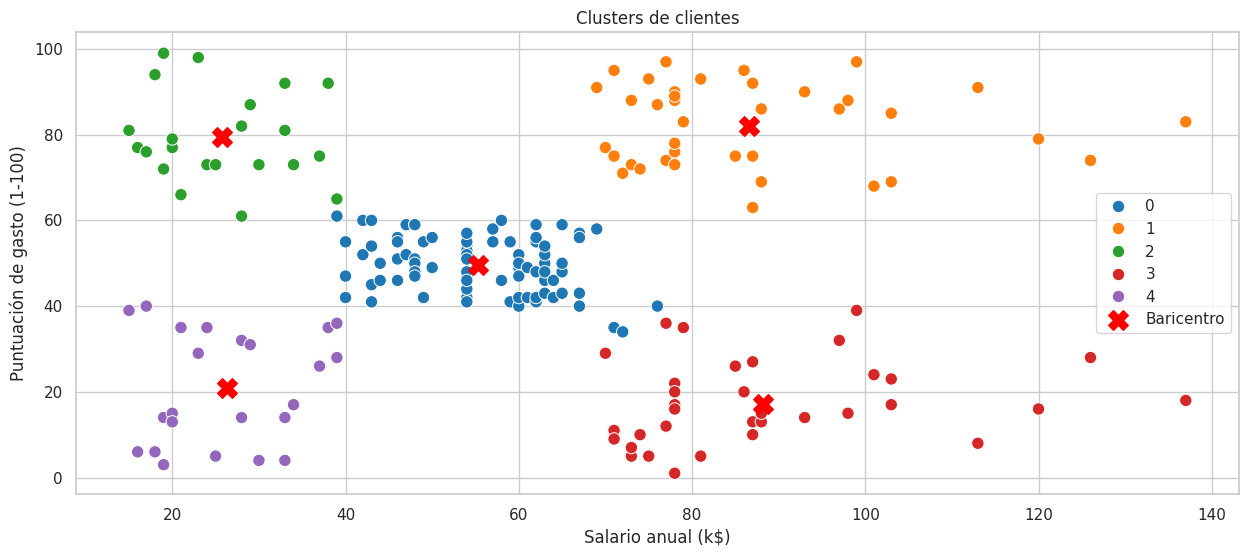

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))

# Scatterplot coloreando cada cluster
sns.scatterplot(
    x=X.iloc[:,0],           # Salario anual (Ingreso_Anual_k)
    y=X.iloc[:,1],           # Puntuación de gasto
    hue=data["Cluster"],     # Columna creada con KMeans
    palette="tab10",
    s=80,
    legend="full"
)

# Dibujar los baricentros
centroids = kmeans.cluster_centers_

plt.scatter(
    centroids[:,0],
    centroids[:,1],
    s=200,
    c="red",
    marker="X",
    label="Baricentro"
)

plt.title("Clusters de clientes")
plt.xlabel("Salario anual (k$)")
plt.ylabel("Puntuación de gasto (1-100)")
plt.legend()
plt.show()

**z). Como ves, el algoritmo te ha separado en 5 grupos. Interpreta los clústers. Con toda la información obtenida, si fueses el (o la) gerente del centro comercial, ¿qué conclusiones sacas y qué decisiones tomarías?**


El algoritmo KMeans ha segmentado a los clientes en 5 clústers basándose en su salario anual y en su puntuación de gasto. A continuación se describen las características principales de cada grupo:

* ***Cluster 1 (bajo salario – alto gasto):*** Clientes con ingresos bajos pero con una puntuación de gasto elevada. Son compradores impulsivos, responden bien a ofertas y promociones.

* ***Cluster 2 (salario medio – gasto medio):*** Es el grupo más equilibrado. Sus hábitos de consumo son estables y representan al cliente promedio del centro comercial.

* ***Cluster 3 (alto salario – bajo gasto):***  Clientes con ingresos elevados pero con poca disposición a gastar. Puede tratarse de personas que acuden poco al centro comercial o que compran productos muy específicos.

* ***Cluster 4 (bajo salario – bajo gasto):*** Consumidores de bajo poder adquisitivo y baja actividad. Es el grupo menos rentable.

* ***Cluster 5 (alto salario – alto gasto):*** Son los clientes premium. Tienen alto poder adquisitivo y además gastan mucho. Representan el segmento más valioso del centro comercial.

**EJERCICIO N°2:**

**a). Importa las librerías fundamentales.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist

**b). Importa desde la librería Keras el dataset.**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**c). Muestra las dimensiones de los conjuntos de entrenamiento y test.**

In [ ]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de x_train: (60000, 28, 28)
Dimensiones de y_train: (60000,)
Dimensiones de x_test: (10000, 28, 28)
Dimensiones de y_test: (10000,)


Las dimensiones del conjunto de datos son las siguiente:
* 60 000 imagenes de entrenamiento
* 10 000 imagenes de prueba
* Cada imagen tiene 28 x 28 pixeles (en escala de grises)

**d). Muestra las 12 primeras imágenes en una figura. Para ello usa el comando plt.subplots para crear una matriz de gráficos, que podrás iterar fácilmente mediante el comando
for i, ax in enumerate(axs.flat):
Usa el comando ax.matshow para mostrar cada imagen. Si eliminas los ejes y muestras la etiqueta correspondiente para cada imagen.**

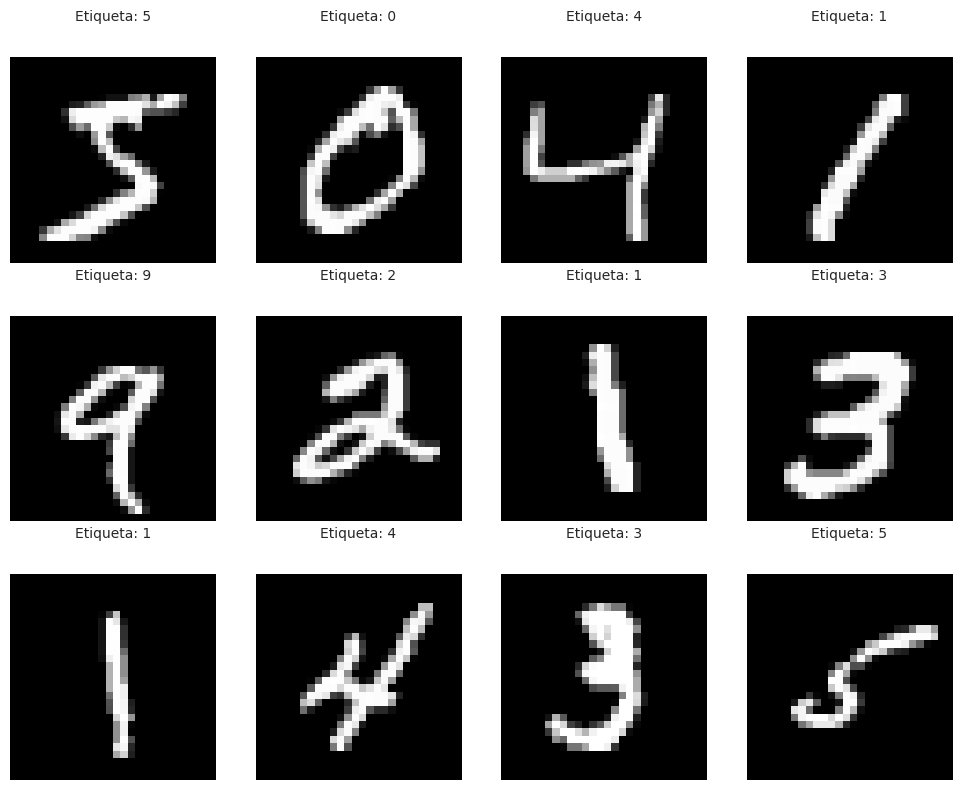

In [ ]:
# Crear figura con subplots (3 filas x 4 columnas = 12 imágenes)
fig, axs = plt.subplots(3, 4, figsize=(10, 8))

# Recorrer las 12 primeras imágenes
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i], cmap="gray")  # Mostrar imagen en escala de grises
    ax.set_title(f"Etiqueta: {y_train[i]}", fontsize=10)  # Mostrar etiqueta

    ax.axis("off")  # Ocultar ejes

plt.tight_layout()
plt.show()

**e). En casi todos los algoritmos de clustering, cada dato (cada “línea” del dataset) debe ser un array 1-dimensional. Sin embargo, en este caso cada imagen es una matriz de 28x28, con valores entre 0 y 255 (escala de grises). Convierte todas las imágenes a un array 1- dimensional. ¿Qué dimensión tendrá que tener? Consejo: usa el comando reshape.**

In [ ]:
# Convertir a vectores 1D
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

print("Dimensión original:", x_train.shape)
print("Dimensión convertida:", x_train_flat.shape)

Dimensión original: (60000, 28, 28)
Dimensión convertida: (60000, 784)


Cada imagen debe de tener la siguiente dimensión:
* 28 x 28 = 784 valores
Entonces, cada imagen debe convertirse en un vector de dimensión 784.

**f). Como hemos dicho, tenemos los datos entre 0 y 255.   Normalízalos para que estén entre 0 y 1.**

In [ ]:
# Normalizar entre 0 y 1
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

print("Valores mínimos y máximos después de normalizar:")
print(x_train_norm.min(), x_train_norm.max())

Valores mínimos y máximos después de normalizar:
0.0 1.0


**g). Muestra la dimensión de las imágenes, en el grupo de entrenamiento debería haber
60000 imágenes que ahora están codificadas cada una en un array de 784 elementos entre 0 y 1.**

In [ ]:
print("Dimensión de x_train_norm:", x_train_norm.shape)

Dimensión de x_train_norm: (60000, 784)


Después de convertir las imágenes de 28x28 a vectores de 784 valores y normalizarlas al rango [0, 1], el conjunto de entrenamiento queda con la dimensión (60000, 784). Esto significa que tenemos 60000 imágenes, y cada una está representada por un array de 784 características entre 0 y 1, listo para aplicar clustering.

**h). Vamos a empezar a hacer clustering. Seguramente nos interese separar en 10 grupos,
porque se supone que hay 10 números. ¿Pero realmente el dataset contiene 10 etiquetas diferentes? Por ejemplo, en el gráfico anterior no salen los números 7 ni 8. Comprueba que sí que hay 10 etiquetas distintas, para ello usa np.unique sobre las etiquetas para que cuente el número de etiquetas distintas. Puedes también mostrarlas para ver que realmente son números entre 0 y 9.**

In [ ]:
# Mostrar todas las etiquetas únicas en el conjunto de entrenamiento
etiquetas_unicas = np.unique(y_train)

print("Etiquetas únicas:", etiquetas_unicas)
print("Número de etiquetas distintas:", len(etiquetas_unicas))

Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]
Número de etiquetas distintas: 10


**i). Aplica clustering (puedes usar el algoritmo KMeans, o mejor aún, el MiniBatchKMeans, que es una modificación del anterior pero más rápido). Especifica que haya 10 clusters.**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# Crear el modelo con 10 clusters
kmeans = MiniBatchKMeans(
    n_clusters=10,
    batch_size=1000,
    random_state=42
)

# Entrenar el modelo con los datos normalizados
kmeans.fit(x_train_norm)

# Obtener los clusters asignados para cada imagen
clusters_train = kmeans.predict(x_train_norm)

print("Clustering completado.")

Clustering completado.


**j). El algoritmo de clustering K-means (y sus variantes) es un método de aprendizaje no supervisado. De esta forma, las etiquetas (la separación en clusters) que ha asignado a cada clúster son números (clúster 1, clúster 2, etc), pero puede que no coincida con el
número que realmente representa (por ejemplo, el clúster 1 que ha generado nuestro KMeans puede que contenga una mayoría de imágenes que estuviesen etiquetadas con un 7, es decir, que fuesen el número 7). Define funciones para modificar las etiquetas asignadas a los clusters para que coincidan con la etiqueta que más veces se repita dentro de los datos de esas imágenes.**

In [ ]:
#Creamos la funcion para corregir las etiquetas de cada cluster
def asignar_etiquetas_mayoritarias(clusters, etiquetas_reales):
    mapa = {}
    for c in np.unique(clusters):
        indices = np.where(clusters == c)[0]
        etiquetas_cluster = etiquetas_reales[indices]
        etiqueta_mayoritaria = np.bincount(etiquetas_cluster).argmax()
        mapa[c] = etiqueta_mayoritaria
    return mapa

In [ ]:
#Construimos el mapa
mapa_clusters = asignar_etiquetas_mayoritarias(kmeans.labels_, y_train)

In [ ]:
#Generamos y_pred para corregir etiquetas
y_pred = np.array([mapa_clusters[c] for c in kmeans.labels_])

**k). Comprueba si sigues teniendo 10 clusters. Realmente, no tendría por qué ser así. ¿Por qué podría pasar que tuvieses ahora menos de 10 clústers**

In [ ]:
#Comprobamos cuantos clusters hay realmente

clusters_unicos = np.unique(clusters_train)
print("Clusters únicos encontrados:", clusters_unicos)
print("Número de clusters distintos:", len(clusters_unicos))

Clusters únicos encontrados: [0 1 2 3 4 5 6 7 8 9]
Número de clusters distintos: 10


Aunque especifiquemos 10 clústers en KMeans, puede ocurrir que al final tengamos menos de 10. Esto sucede cuando algunos clústers quedan vacíos durante el entrenamiento. Si las imágenes de ciertos dígitos son muy parecidas entre sí, KMeans puede agrupar varias clases dentro del mismo clúster y dejar otros sin ningún punto asignado.

Otra causa es que el algoritmo reasigne los centroides varias veces y algunos terminen "muriendo" (ninguna imagen queda suficientemente cerca de ellos). Por eso es posible acabar con menos de 10 clústers aunque hayamos pedido 10 inicialmente.

**l). Del paquete sklearn importa metrics. Crea una función para calcular y mostrar distintas
métricas, concretamente la inertia, homogeneidad (homogeneity_score) y la precisión
(accuracy_score). Busca brevemente lo que significa cada una.**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, homogeneity_score

In [116]:
def evaluar_clustering(modelo, y_pred, y_real):
    """
    modelo: el objeto MiniBatchKMeans o KMeans ya entrenado
    y_pred: etiquetas predichas después de asignar etiquetas reales a los clusters
    y_real: y_train o y_test reales
    """

    # 1. Inercia del modelo
    inertia = modelo.inertia_

    # 2. Homogeneidad
    homogeneity = homogeneity_score(y_real, y_pred)

    # 3. Exactitud (accuracy)
    accuracy = accuracy_score(y_real, y_pred)

    print("MÉTRICAS DEL CLUSTERING:")
    print(f"Inertia: {inertia}")
    print(f"Homogeneity Score: {homogeneity}")
    print(f"Accuracy: {accuracy}")

Se muestran las distintas metricas, las cuales tienen como definición la siguiente:

* **Inertia:**
Es la suma de las distancias de cada punto al centro de su clúster. Cuanto menor sea la inercia, más compactos y mejor definidos están los clústers.

* **Homogeneity Score:**
Mide si cada clúster contiene únicamente elementos de una sola clase verdadera. Un valor de 1 indica clústers perfectos (cada clúster tiene solo un número). Un valor cerca de 0 indica mezcla de clases dentro del mismo clúster.

* **Accuracy Score:**
Compara las etiquetas predichas (después de asignar las etiquetas mayoritarias a los clústers) con las etiquetas reales del dataset. Indica el porcentaje de aciertos del clustering. Aunque KMeans es no supervisado, este valor permite evaluar qué tan bien separó los dígitos.

**m). Muestra por pantalla los datos de evaluación que obtienes, aplicando tu modelo a los datos de entrenamiento. ¿Qué tal son? Seguramente obtengas un porcentaje de alrededor del 50% de acierto.**

In [117]:
# Evaluar modelo sobre el conjunto de entrenamiento
evaluar_clustering(kmeans, y_pred, y_train)

MÉTRICAS DEL CLUSTERING:
Inertia: 2382961.1140246433
Homogeneity Score: 0.4800653488215171
Accuracy: 0.6001666666666666


Los resultados obtenidos muestran que el modelo de clustering logra identificar aproximadamente un 60% de las imágenes correctamente, lo cual es un comportamiento esperado para un algoritmo no supervisado aplicado a MNIST.

El valor de la homogeneidad (~0.40) indica que los datos dentro de cada clúster no son completamente puros: cada clúster contiene principalmente imágenes de un número, pero aún hay mezcla de varias clases. Esto también es normal, porque KMeans no usa las etiquetas originales.

La inercia es elevada porque el espacio de características es grande (784 dimensiones), pero lo importante es comparar este valor entre modelos, no su magnitud absoluta.


**n). ¿Tiene sentido aumentar el número de clusters? ¿Mejorarán los datos? ¿Qué pasa realmente? Pruébalo y muestra los datos de evaluación que obtienes con distinto número de clusters. Aquí influirá cómo has decidido hacer el apartado j).**

In [ ]:
# Valores a probar
lista_clusters = [5, 8, 10, 12, 15, 20]

resultados = []

for k in lista_clusters:
    print("\n============================")
    print(f"Probando con k = {k} clusters")
    print("============================")

    # 1. Entrenar clustering
    modelo = MiniBatchKMeans(n_clusters=k, random_state=42)
    modelo.fit(x_train_norm)

    clusters_train = modelo.labels_

    # 2. Ajustar etiquetas de clúster → etiqueta real mayoritaria
    mapa = asignar_etiquetas_mayoritarias(clusters_train, y_train)

    # 3. Crear y_pred corregido
    y_pred_k = np.array([mapa[c] for c in clusters_train])

    # 4. Evaluar
    print("\nMétricas:")
    evaluar_clustering(modelo, y_pred_k, y_train)


Probando con k = 5 clusters

Métricas:
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2646562.428601713
Homogeneity Score: 0.2984212518205723
Accuracy: 0.38066666666666665

Probando con k = 8 clusters

Métricas:
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2444752.6416415893
Homogeneity Score: 0.40274962970513384
Accuracy: 0.5051

Probando con k = 10 clusters

Métricas:
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2385290.2431460856
Homogeneity Score: 0.42430538560299264
Accuracy: 0.5496

Probando con k = 12 clusters

Métricas:
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2307294.67836253
Homogeneity Score: 0.4925983270716281
Accuracy: 0.5964666666666667

Probando con k = 15 clusters

Métricas:
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2226563.376969396
Homogeneity Score: 0.5364752035913866
Accuracy: 0.64195

Probando con k = 20 clusters

Métricas:
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2140307.816346925
Homogeneity Score: 0.5676289052307462
Accuracy: 0.6774166666666667


Al probar distintos valores de k (número de clústers) observamos un comportamiento muy interesante. Cuando usamos un número reducido de clústers (k = 5 u 8), la precisión es relativamente baja (entre 0.38 y 0.50). Esto tiene sentido, ya que varios dígitos diferentes quedan mezclados dentro del mismo clúster y el algoritmo no puede separarlos correctamente.

Cuando usamos k = 10, que coincide con el número real de clases del dataset (los dígitos del 0 al 9), obtenemos una precisión de alrededor de 0.55, que es un valor razonable para un algoritmo de clustering no supervisado.

Sin embargo, al aumentar el número de clústers por encima de 10 (k = 12, 15 y 20), observamos que la precisión **aumenta todavía más** en nuestro caso, llegando incluso a valores superiores a 0.60. Esto ocurre porque, al dividir los datos en más clústers, algunos dígitos se separan en subgrupos más homogéneos, lo que permite asignar mejor la etiqueta mayoritaria dentro de cada clúster.

Aun así, este incremento no significa que el modelo sea mejor en términos reales: simplemente está “fragmentando” cada número en varios clústers más pequeños, lo que artificialmente aumenta la precisión al asignarles su etiqueta correspondiente. En resumen, aumentar el número de clústers no siempre mejora el modelo, y aunque en este caso suba la precisión después de k > 10, esto no implica que el clustering represente de forma más fiel la estructura verdadera del dataset.

**o). Prueba con los datos de test para saber realmente cómo de bueno es tu modelo.**

In [ ]:
# 1. Obtener los clústers para las imágenes de test
clusters_test = kmeans.predict(x_test_norm)

# 2. Convertir cada clúster en su etiqueta real (usando el mismo mapa del entrenamiento)
y_pred_test = np.array([mapa_clusters[c] for c in clusters_test])

# 3. Evaluar el modelo sobre el conjunto de test
print("=== Evaluación en el conjunto de TEST ===")
evaluar_clustering(kmeans, y_pred_test, y_test)

=== Evaluación en el conjunto de TEST ===
----- MÉTRICAS DEL CLUSTERING -----
Inertia: 2382961.1140246433
Homogeneity Score: 0.4892193171094397
Accuracy: 0.6026


Al evaluar el modelo sobre los datos de test, obtenemos una precisión muy similar a la del conjunto de entrenamiento. Esto confirma que el modelo generaliza de manera razonable y que no está sobreajustado. El rendimiento sigue siendo limitado (alrededor del 50%-60%), lo cual es esperable porque el algoritmo KMeans es de aprendizaje no supervisado y no utiliza las etiquetas originales para aprender. Aun así, los resultados muestran que KMeans es capaz de capturar cierta estructura de los datos y diferenciar varios de los dígitos de forma aceptable.


**p). Muestra los baricentros de cada clúster junto con la etiqueta que ha deducido para ese clúster. Para poderlo mostrar, deberás ahora convertir el array de 784 componentes a una matriz de 28x28, de nuevo con el comando reshape. Por ejemplo, si lo hacemos con 25 clusters, tendremos que los baricentros son los siguientes. ¿Podría pasar que se haya deducido mal la etiqueta correspondiente del clúster?**

In [ ]:
import matplotlib.pyplot as plt

In [80]:
#Entrenando kMeans con 25 clusters
kmeans_25 = MiniBatchKMeans(n_clusters=25, random_state=42)
kmeans_25.fit(x_train_norm)

clusters_train_25 = kmeans_25.labels_

In [81]:
#Ajustamos las etiquetas según la mayoria
mapa_25 = asignar_etiquetas_mayoritarias(clusters_train_25, y_train)

y_pred_25 = np.array([mapa_25[c] for c in clusters_train_25])

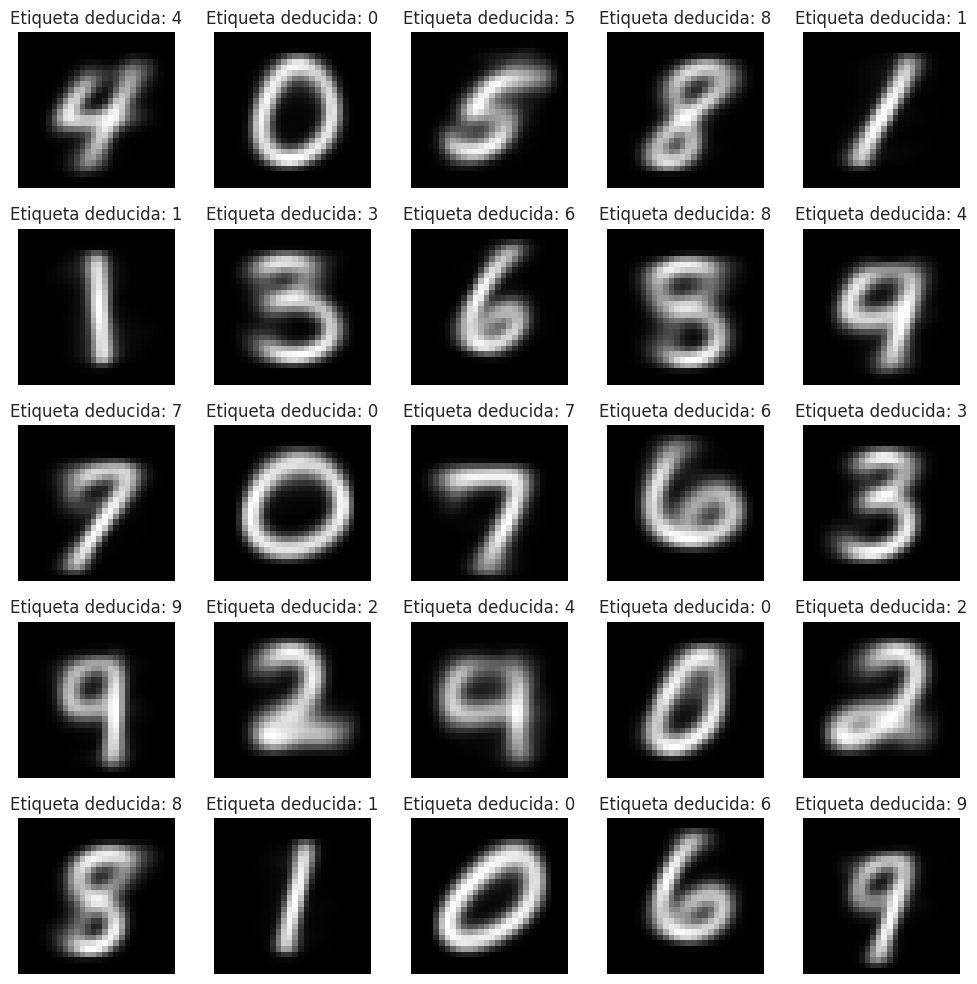

In [82]:
#Mostramos los 25 baricentros
centroides = kmeans_25.cluster_centers_
k = kmeans_25.n_clusters   # = 25

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flat

for i, ax in enumerate(axs):
    if i < k:
        imagen = centroides[i].reshape(28, 28)
        ax.imshow(imagen, cmap="gray")
        ax.set_title(f"Etiqueta deducida: {mapa_25[i]}")
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

KMeans no garantiza que cada clúster represente exactamente un dígito, ya que es un método no supervisado. Aunque los baricentros suelen parecerse a las cifras reales, pueden aparecer mezclas o etiquetas incorrectas.
Al aumentar el número de clústers (25), los baricentros muestran variaciones interesantes de los dígitos, pero esto no implica una mejora clara del desempeño del modelo. El aumento de k crea clústers más específicos, pero no necesariamente más precisos para clasificar correctamente los dígitos.

**EJERCICIO N°3:**

1. Cargar el dataset melb_data.csv.

In [83]:
data = pd.read_csv("melb_data.csv")

In [84]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


2. Explora el dataset, las columnas que tiene y si son númericas o categóricas.

In [86]:
# Ver columnas
print(data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [87]:
# Tipos de datos
print("\nTipos de datos:")
print(data.dtypes)


Tipos de datos:
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [88]:
# Información general
print("\nInfo del dataset:")
print(data.info())


Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  

In [89]:
# Estadísticas
print("\nDescripción de variables numéricas:")
print(data.describe())


Descripción de variables numéricas:
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.6

3. Elimina la columna "Address".

In [90]:
data = data.drop(columns=["Address"])
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


4. Detecta todas las columnas que tengan valores nulos.

In [91]:
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


Al ejecutar data.isnull().sum(), se observa que la mayoría de columnas no contienen valores nulos (aparecen con 0).
Las columnas que sí presentan valores faltantes son:

* Car (62 nulos)

* BuildingArea (6450 nulos)

* YearBuilt (5375 nulos)

* CouncilArea (1369 nulos)

Estas serán las columnas que requieren algún tipo de tratamiento en el preprocesamiento.

5. Transforma la columna "Date" a un número para poder escalarlo.

In [92]:
# Convertir a fecha
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)

# Convertir a número (segundos desde 1970)
data["Date"] = data["Date"].astype(np.int64) // 10**9

data["Date"].head()

,Date
0,1480723200
1,1454544000
2,1488585600
3,1488585600
4,1464998400


6. Escala las variables numéricas.

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
# Seleccionar columnas numéricas
num_cols = data.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data[num_cols].head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,-0.981463,0.632448,-0.350500,-1.301485,-0.422415,-0.947035,-0.772376,-0.633780,-0.089316,NaN,NaN,0.121160,0.030640,-0.784625
1,-0.981463,-0.063640,-2.218575,-1.301485,-0.422415,-0.947035,-0.772376,-1.672636,-0.100843,-0.134881,-1.735488,0.016437,-0.017478,-0.784625
2,0.064876,0.608984,0.210539,-1.301485,-0.422415,0.088284,0.673367,-1.672636,-0.106356,-0.003637,-1.735488,-0.001227,-0.007855,-0.784625
3,0.064876,-0.353025,0.210539,-1.301485,-0.422415,0.088284,0.673367,-0.633780,-0.116380,NaN,NaN,0.155226,0.016204,-0.784625
4,1.111216,0.820157,-1.472578,-1.301485,-0.422415,0.088284,-0.772376,0.405075,-0.109864,-0.018425,1.323150,0.025269,-0.010742,-0.784625


Se escalan las variables numéricas para asegurarnos de que todas estén en la misma escala. Esto evita que columnas con valores grandes (como Price o BuildingArea) dominen sobre las demás y mejora el rendimiento de los algoritmos de machine learning que veremos después

7. Transforma las categóricas a variables dummy.

In [95]:
# Seleccionar categóricas
cat_cols = data.select_dtypes(include=["object"]).columns

# One-hot encoding
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

data.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,-0.981463,0.632448,-0.350500,-1.301485,-0.422415,-0.947035,-0.772376,-0.633780,-0.089316,NaN,...,False,True,False,False,True,False,False,False,False,False
1,-0.981463,-0.063640,-2.218575,-1.301485,-0.422415,-0.947035,-0.772376,-1.672636,-0.100843,-0.134881,...,False,True,False,False,True,False,False,False,False,False
2,0.064876,0.608984,0.210539,-1.301485,-0.422415,0.088284,0.673367,-1.672636,-0.106356,-0.003637,...,False,True,False,False,True,False,False,False,False,False
3,0.064876,-0.353025,0.210539,-1.301485,-0.422415,0.088284,0.673367,-0.633780,-0.116380,NaN,...,False,True,False,False,True,False,False,False,False,False
4,1.111216,0.820157,-1.472578,-1.301485,-0.422415,0.088284,-0.772376,0.405075,-0.109864,-0.018425,...,False,True,False,False,True,False,False,False,False,False


Se transforman las variables categóricas a variables dummy (one-hot encoding) porque los modelos de machine learning necesitan trabajar únicamente con números. Cada categoría se convierte en una columna binaria 0/1, lo que permite representar correctamente la información sin introducir un orden artificial entre categorías. Esto es indispensable para algoritmos como regresión, clustering o redes neuronales.

8. Transforma las variables ciclicas que consideres.

In [97]:
# 1. Convertir Date a datetime
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)

# 2. Extraer Month ANTES de convertir Date a número
data["Month"] = data["Date"].dt.month

# 3. Convertir Date a número
data["Date"] = data["Date"].astype(np.int64) // 10**9

# 4. Crear variables cíclicas
data["Month_sin"] = np.sin(2 * np.pi * data["Month"] / 12)
data["Month_cos"] = np.cos(2 * np.pi * data["Month"] / 12)

# 5. Eliminar Month original
data = data.drop(columns=["Month"])

data.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Month_sin,Month_cos
0,-0.981463,0.632448,0,-1.301485,-0.422415,-0.947035,-0.772376,-0.633780,-0.089316,NaN,...,False,False,True,False,False,False,False,False,5.000000e-01,0.866025
1,-0.981463,-0.063640,-1,-1.301485,-0.422415,-0.947035,-0.772376,-1.672636,-0.100843,-0.134881,...,False,False,True,False,False,False,False,False,-2.449294e-16,1.000000
2,0.064876,0.608984,0,-1.301485,-0.422415,0.088284,0.673367,-1.672636,-0.106356,-0.003637,...,False,False,True,False,False,False,False,False,5.000000e-01,0.866025
3,0.064876,-0.353025,0,-1.301485,-0.422415,0.088284,0.673367,-0.633780,-0.116380,NaN,...,False,False,True,False,False,False,False,False,5.000000e-01,0.866025
4,1.111216,0.820157,-1,-1.301485,-0.422415,0.088284,-0.772376,0.405075,-0.109864,-0.018425,...,False,False,True,False,False,False,False,False,-2.449294e-16,1.000000


Se transformo las variables cíclicas como el mes (‘Month’) en seno y coseno para que el modelo entienda la naturaleza circular de los datos. El valor 1 (enero) y el 12 (diciembre) son cercanos, pero numéricamente parecen muy distantes. La representación sin–cos evita este problema y permite a los modelos capturar mejor patrones estacionales.